# Project: COVID-19 Vaccination Effectiveness
## Project Description
In this project, we will look at how effective the COVID-19 vaccinations were on factors such as hospitalisations, confirmed cases and mortality rates. 

**Team Members:**
- Geoffrey Pang
- John Porretta
- Cayley Morrow

## Research Questions to Answer


**1. How have COVID-19 vaccines affected? (world comparison)?**
- 1a: Australia: New Cases vs New Deaths
- 1b: Australia, Israel & Sweden: ICU patient admissions, confirmed cases and mortality rates?
**2. Does a difference in healthcare expenditure affect COVID-19 cases (using WorldBank API)?**
- first world  (Australia, Israel, Sweden, Japan, UK, USA, Singapore)
- second world (Russia, Albania, Serbia, Poland, Romania)
- third world (China, Syria, North Korea, Saudi Arabia, Yemen, Sudan, Burundi, Iran, Vietnam) – based on political and social aspects.
**3. Australia: Was vaccination effective?**

**4. How effective was using different vaccines?**
- Israel (Pfizer only), China (SinoVax, SinoPharm) and Australia (AstraZ, Moderna, Pfizer)

In [1]:
# import necessary modules
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import json
from scipy.stats import linregress

## Our Data sets are taken from this two sources:

**1. One World In Data - contains all the latest Covid19 data from around the world.**
- https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv
- the description of the dataset is given here
https://github.com/owid/covid-19-data/tree/master/public/data
**2. World Bank to get GDP per capita**
- https://datahelpdesk.worldbank.org/knowledgebase/topics/125589-developer-information

## Processing Data Set 1: One World in Data

In [2]:
# Reading csv file 
data = pd.read_csv('Data_Files/owid-covid-data.csv')

# Display the first few rows of the DataFrame
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
# Inspect the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336078 entries, 0 to 336077
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    336078 non-null  object 
 1   continent                                   320099 non-null  object 
 2   location                                    336078 non-null  object 
 3   date                                        336078 non-null  object 
 4   total_cases                                 298424 non-null  float64
 5   new_cases                                   326839 non-null  float64
 6   new_cases_smoothed                          325576 non-null  float64
 7   total_deaths                                277172 non-null  float64
 8   new_deaths                                  326894 non-null  float64
 9   new_deaths_smoothed                         325664 non-null  float64
 

In [4]:
# Get unique values in the iso_code
#unique_values = data['iso_code'].unique()
#unique_values

In [5]:
# Get unique values in the country
unique_values = data['location'].unique()
unique_values

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [6]:
# Select the columns that we wanted to work with
covid19_data = data[['location', 'date', 'iso_code','total_cases',
                        'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million',
                         'icu_patients_per_million', 'hosp_patients_per_million', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
                         'total_boosters_per_hundred', 'excess_mortality'
                        ]]

covid19_data.head()

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,excess_mortality
0,Afghanistan,2020-01-03,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-04,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-01-05,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-01-06,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-01-07,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Rename the columns using the .rename() method
new_column_names = {
    'location': 'Location',
    'iso_code': 'ISO_Code',
    'date' : 'Date',
    'total_cases': 'Total_Cases',
    'new_cases': 'New_Cases',
    'total_deaths': 'Total_Deaths',
    'new_deaths': 'New_Deaths',
    'total_cases_per_million': 'Total_Cases_PerMillion',
    'new_cases_per_million': 'New_Cases_PerMillion',
    'total_deaths_per_million': 'Total_Deaths_PerMillion',
    'new_deaths_per_million': 'New_Deaths_PerMillion',
    'icu_patients_per_million': 'ICU_Patients_PerMillion',
    'hosp_patients_per_million': 'Hospital_Patients_PerMillion',
    'total_vaccinations_per_hundred': 'Total_Vaccinations_PerHundred',
    'people_vaccinated_per_hundred': 'People_Vaccinated_PerHundred',
    'people_fully_vaccinated_per_hundred': 'People_Fully_Vaccinated_PerHundred',
    'total_boosters_per_hundred': 'Total_Boosters_PerHundred',
    'excess_mortality': 'Excess_Mortality',    
    'population_density': 'Population_Density'
}

covid19_data = covid19_data.rename(columns=new_column_names)
covid19_data.head()

,Location,Date,ISO_Code,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Cases_PerMillion,New_Cases_PerMillion,Total_Deaths_PerMillion,New_Deaths_PerMillion,ICU_Patients_PerMillion,Hospital_Patients_PerMillion,Total_Vaccinations_PerHundred,People_Vaccinated_PerHundred,People_Fully_Vaccinated_PerHundred,Total_Boosters_PerHundred,Excess_Mortality
0,Afghanistan,2020-01-03,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-04,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-01-05,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-01-06,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-01-07,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## This is our Master Dataset that we can further process per required for the individual plotting.

In [8]:
# This is our Master Dataset that we can further process per required for the individual plotting.
#  Change the Date column to date_time format
covid19_data['Date'] = pd.to_datetime(covid19_data['Date'])
covid19_data.info()

# output to csv file
covid19_data.to_csv('Data_Files/covid19_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336078 entries, 0 to 336077
Data columns (total 18 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Location                            336078 non-null  object        
 1   Date                                336078 non-null  datetime64[ns]
 2   ISO_Code                            336078 non-null  object        
 3   Total_Cases                         298424 non-null  float64       
 4   New_Cases                           326839 non-null  float64       
 5   Total_Deaths                        277172 non-null  float64       
 6   New_Deaths                          326894 non-null  float64       
 7   Total_Cases_PerMillion              298424 non-null  float64       
 8   New_Cases_PerMillion                326839 non-null  float64       
 9   Total_Deaths_PerMillion             277172 non-null  float64       
 10  New_Deat

# Processing Data Set 2

## Steps taken
- Pull the GDP Per Capita and Population from World Bank API for Australia, Sudan and Poland.  The Population data from csv seem wrong since it is the same value for each year.
- Create a merge dataframe with this GDP Per Capita with the master dataframe
- Do some groupby function for mean by month for columns Total_Cases_PerMillion and Total_Vaccinations_PerHundred 
- Generate the necesary plots

In [9]:
## Define a function to output based on certain country.
def process_covid19_sum_data(covid19_data, country):
    # Apply filter for rows where 'location' is in the list_of_countries
    filtered_covid19_data = covid19_data[covid19_data['Location'].isin(country)]
    
    # Drop rows with null values in subset columns
    cleaned_covid19_data = filtered_covid19_data.dropna(subset=['Total_Cases_PerMillion', 'Total_Vaccinations_PerHundred'])

    
    # Group by 'date' column and aggregate the specified columns
    grouped = cleaned_covid19_data.groupby(cleaned_covid19_data['Date'].dt.strftime('%Y-%m')).agg({
        'Total_Cases': 'sum',
        'New_Cases': 'sum',
        'Total_Deaths': 'sum',
        'New_Deaths': 'sum',
        'Total_Cases_PerMillion' : 'mean',
        'Total_Vaccinations_PerHundred' : 'mean'
    })
    
    # Move the index to a new column ('Month-Year')
    grouped.reset_index(drop=False, inplace=True)
    
    return grouped

country = ['Australia']  # Note the use of square brackets to define a list

# to create a filtered data for another country dataframe, just change Australia to Sudan for example
Australia_grouped_cm_data = process_covid19_sum_data(covid19_data, country)
Australia_grouped_cm_data.head()

,Date,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Cases_PerMillion,Total_Vaccinations_PerHundred
0,2021-02,231572.0,50.0,7392.0,0.0,1105.781625,0.068750
1,2021-03,903304.0,334.0,28667.0,2.0,1113.129226,1.008710
2,2021-04,885301.0,497.0,27812.0,2.0,1127.309233,5.586333
3,2021-05,928970.0,305.0,28768.0,0.0,1144.757032,12.242903
4,2021-06,915009.0,729.0,27840.0,0.0,1165.138200,23.545000


In [10]:
# codes to pull Australia data from World Bank API and then merge with Poland dataframe
# Accessing the WorldBank API for GDP
url = "http://api.worldbank.org/v2/country/"
country_code = "SD"
gdp_indicator = "NY.GDP.PCAP.CD"
start_year = 2020
last_year = 2022

Aus_gdp_data = []

for year in range(start_year, last_year + 1):

    Aus_gdp_query_url = f"{url}{country_code}/indicator/{gdp_indicator}?date={year}&format=json"

    Aus_gdp_request = (requests.get(Aus_gdp_query_url)).json()
    
    Aus_gdp_data.append(Aus_gdp_request)
        
    #pprint(Aus_gdp_request)

In [11]:
Aus_gdp_values = []

for data in Aus_gdp_data:
    if data[1]:
        Aus_gdp_values.append({
            "Date": data[1][0]["date"],
            "GDP_per_capita": data[1][0]["value"]
        })

Aus_gdp_df = pd.DataFrame(Aus_gdp_values)
Aus_gdp_df

,Date,GDP_per_capita
0,2020,608.332520
1,2021,749.706787
2,2022,1102.146484


In [12]:
# Function to map year to GDP
def map_year_to_GDP(date_str):
    year = int(date_str.split('-')[0])
    for index, row in Aus_gdp_df.iterrows():
        if year == pd.to_numeric(row["Date"], errors='coerce'):
            return row["GDP_per_capita"]
    return None

# Apply the mapping function to create a new "Population" column
Australia_grouped_cm_data['GDP_per_capita'] = Australia_grouped_cm_data["Date"].apply(map_year_to_GDP)

# Display the DataFrame
Australia_grouped_cm_data.head()

,Date,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Cases_PerMillion,Total_Vaccinations_PerHundred,GDP_per_capita
0,2021-02,231572.0,50.0,7392.0,0.0,1105.781625,0.068750,749.706787
1,2021-03,903304.0,334.0,28667.0,2.0,1113.129226,1.008710,749.706787
2,2021-04,885301.0,497.0,27812.0,2.0,1127.309233,5.586333,749.706787
3,2021-05,928970.0,305.0,28768.0,0.0,1144.757032,12.242903,749.706787
4,2021-06,915009.0,729.0,27840.0,0.0,1165.138200,23.545000,749.706787


In [13]:
# codes to pull Poland data from World Bank API and then merge with Poland dataframe
country = ['Poland']  # Note the use of square brackets to define a list

Poland_grouped_cm_data = process_covid19_sum_data(covid19_data, country)

url = "http://api.worldbank.org/v2/country/"
country_code = "PL"
gdp_indicator = "NY.GDP.PCAP.CD"
start_year = 2020
last_year = 2022

Pol_gdp_data = []

for year in range(start_year, last_year + 1):

    Pol_gdp_query_url = f"{url}{country_code}/indicator/{gdp_indicator}?date={year}&format=json"

    Pol_gdp_request = (requests.get(Pol_gdp_query_url)).json()
    
    Pol_gdp_data.append(Pol_gdp_request)

Pol_gdp_values = []

for data in Pol_gdp_data:
    if data[1]:
        Pol_gdp_values.append({
            "Date": data[1][0]["date"],
            "GDP_per_capita": data[1][0]["value"]
        })

Pol_gdp_df = pd.DataFrame(Pol_gdp_values)

# Function to map year to GDP
def map_year_to_GDP(date_str):
    year = int(date_str.split('-')[0])
    for index, row in Pol_gdp_df.iterrows():
        if year == pd.to_numeric(row["Date"], errors='coerce'):
            return row["GDP_per_capita"]
    return None

# Apply the mapping function to create a new "Population" column
Poland_grouped_cm_data['GDP_per_capita'] = Poland_grouped_cm_data["Date"].apply(map_year_to_GDP)

# Display the DataFrame
Poland_grouped_cm_data.head()

,Date,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Cases_PerMillion,Total_Vaccinations_PerHundred,GDP_per_capita
0,2020-12,5115585.0,37477.0,111531.0,1435.0,32087.001750,0.060000,15816.820402
1,2021-01,42752157.0,207139.0,995077.0,8216.0,35754.491067,1.307000,17999.832268
2,2021-02,36655960.0,153696.0,933815.0,5340.0,39986.241652,5.492609,17999.832268
3,2021-03,47380382.0,476154.0,1153347.0,7201.0,49531.461208,11.940833,17999.832268
4,2021-04,52259576.0,318697.0,1207249.0,9864.0,65558.605950,21.508500,17999.832268


In [14]:
# codes to pull Sudan data from World Bank API and then merge with Poland dataframe
country = ['Sudan']  # Note the use of square brackets to define a list

Sudan_grouped_cm_data = process_covid19_sum_data(covid19_data, country)

url = "http://api.worldbank.org/v2/country/"
Sud_country_code = "SD"
gdp_indicator = "NY.GDP.PCAP.CD"
start_year = 2020
last_year = 2022

Sud_gdp_data = []

for year in range(start_year, last_year + 1):

    Sud_gdp_query_url = f"{url}{Sud_country_code}/indicator/{gdp_indicator}?date={year}&format=json"

    Sud_gdp_request = (requests.get(Sud_gdp_query_url)).json()
    
    Sud_gdp_data.append(Sud_gdp_request)

Sud_gdp_values = []

for data in Sud_gdp_data:
    if data[1]:
        Sud_gdp_values.append({
            "Date": data[1][0]["date"],
            "GDP_per_capita": data[1][0]["value"]
        })

Sud_gdp_df = pd.DataFrame(Sud_gdp_values)

# Function to map year to GDP
def map_year_to_GDP(date_str):
    year = int(date_str.split('-')[0])
    for index, row in Sud_gdp_df.iterrows():
        if year == pd.to_numeric(row["Date"], errors='coerce'):
            return row["GDP_per_capita"]
    return None

# Apply the mapping function to create a new "Population" column
Sudan_grouped_cm_data['GDP_per_capita'] = Sudan_grouped_cm_data["Date"].apply(map_year_to_GDP)
#change date to date time 
# Display the DataFrame
Sudan_grouped_cm_data.head()

,Date,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Cases_PerMillion,Total_Vaccinations_PerHundred,GDP_per_capita
0,2021-03,30820.0,64.0,1929.0,5.0,657.505000,0.000000,749.706787
1,2021-04,131535.0,306.0,8768.0,39.0,701.532250,0.185000,749.706787
2,2021-05,35495.0,16.0,2630.0,2.0,757.240000,0.760000,749.706787
3,2021-06,253876.0,211.0,19058.0,15.0,773.730714,1.178571,749.706787
4,2021-07,37177.0,34.0,2777.0,0.0,793.123000,1.730000,749.706787


## Question 1: How have COVID-19 vaccines affected?  (world comparison)
- Australia:  New Cases vs New Deaths
- Australia, Israel & Sweden: ICU patient admissions, confirmed cases and mortality rate

## Prepare the dataframe
### Question 1a. Australia: New Cases vs New Deaths

In [15]:
## Define a function to output based on certain country.
def process_covid19_sum_data(covid19_data, country):
    # Apply filter for rows where 'location' is in the list_of_countries
    filtered_covid19_data = covid19_data[covid19_data['Location'].isin(country)]
    
    # Group by 'date' column and aggregate the specified columns
    grouped = filtered_covid19_data.groupby(filtered_covid19_data['Date'].dt.strftime('%Y-%m')).agg({
        'Total_Cases': 'sum',
        'New_Cases': 'sum',
        'Total_Deaths': 'sum',
        'New_Deaths': 'sum'
    })
    
    # Move the index to a new column ('Month-Year')
    grouped.reset_index(drop=False, inplace=True)
    
    return grouped

country = ['Australia']  # Note the use of square brackets to define a list

# to create a filtered data for another country dataframe, just change Australia to Zimbabwe for example
Australia_grouped_gp1_sum_data = process_covid19_sum_data(covid19_data, country)
Australia_grouped_gp1_sum_data.head()

,Date,Total_Cases,New_Cases,Total_Deaths,New_Deaths
0,2020-01,35.0,9.0,0.0,0.0
1,2020-02,478.0,16.0,0.0,0.0
2,2020-03,31988.0,4334.0,231.0,21.0
3,2020-04,186937.0,2387.0,1895.0,74.0
4,2020-05,216814.0,439.0,3204.0,12.0


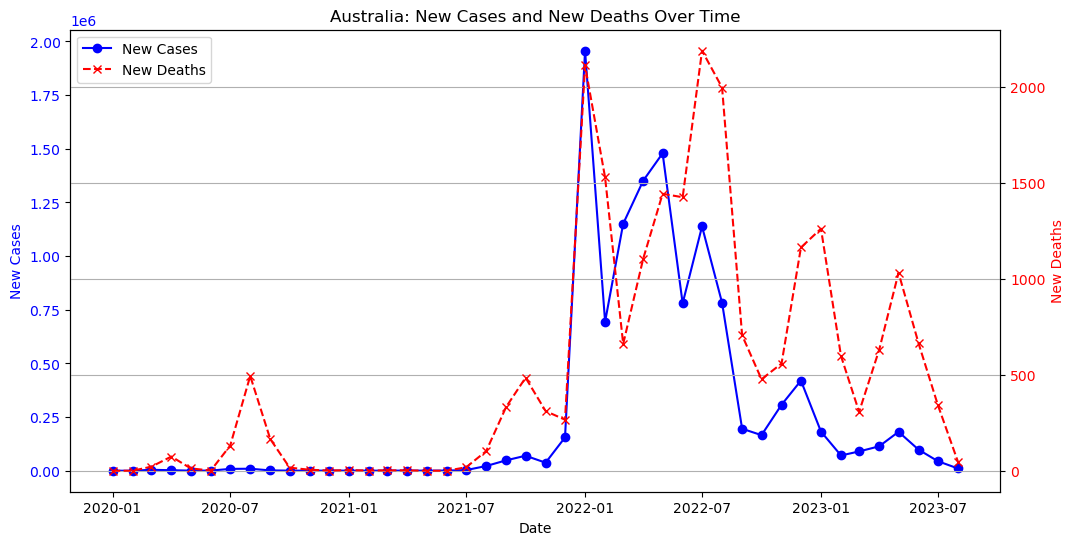

In [16]:
# copy dataframe
df1 = Australia_grouped_gp1_sum_data.copy()

# Convert the 'Date' column to datetime if it's not already in datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m')

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'newCases' on the left y-axis
ax1.plot(df1['Date'], df1['New_Cases'], label='New Cases', color='b', marker='o', linestyle='-')
ax1.set_xlabel('Date')
ax1.set_ylabel('New Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis on the right side for 'newDeaths'
ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['New_Deaths'], label='New Deaths', color='r', marker='x', linestyle='--')
ax2.set_ylabel('New Deaths', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

plt.title('Australia: New Cases and New Deaths Over Time')
plt.grid(True)

# Save the plot as an image
plt.savefig('Images/Q1a_Australia_New_Cases_vs_New_Deaths') 

plt.show()

**Observation:**
- At least 7 waves are observed based on the New Deaths. 
1. 1st Wave: Mar-Apr 2020: Alpha
2. 2nd Wave: Jun-Oct 2020: Beta
3. 3rd Wave: Jun-Oct 2021: Delta
4. 4th (Omnicron) Wave: Nov 21-Feb 22: When Australia open international borders.
5. 5th Wave: July 2022. BA.4.5 and BA.5 which which is Omnicron sub-variants that caused the highest death rate. 
6. 6th wave: end 2022.  Omnicron BA.2 and BA.5 sub-lineages continue to drive transmission.
7. 7th Wave: May 2023.  Omnicron variants XBB.1.5 XBB, XBB.1.16
- Highest Peak coincides with Omnicron variant starting Feb 2022 when Australia open international borders.
- New Deaths Peak coincides with New Cases Peaks.

## Prepare the dataframe
### Question 1b. Australia, Israel & Sweden: ICU patient admissions, confirmed cases and mortality rate

In [17]:
Australia_data = covid19_data[covid19_data['Location'] == 'Australia']
Israel_data = covid19_data[covid19_data['Location'] == 'Israel']
Sweden_data = covid19_data[covid19_data['Location'] == 'Sweden']

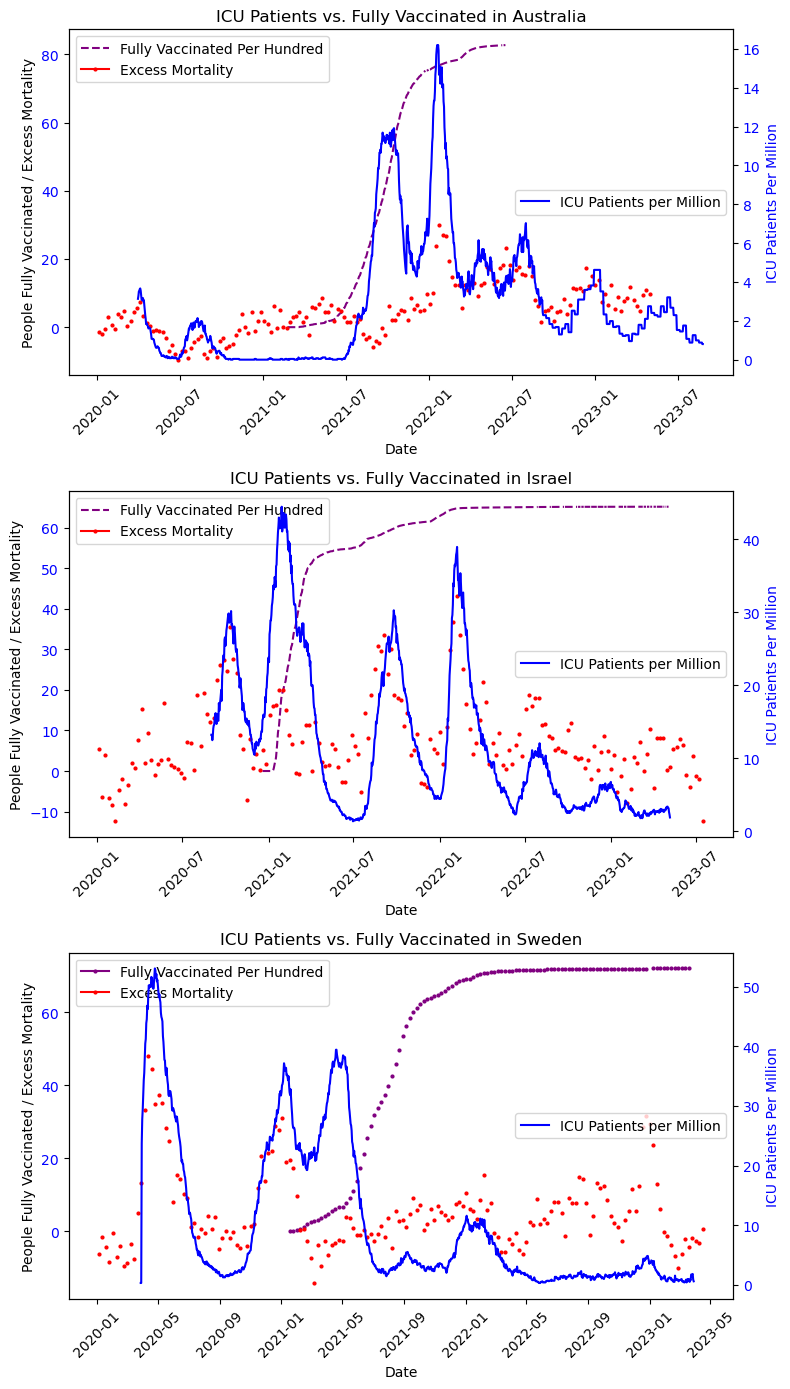

In [18]:
# Create subplots in a vertical layout
fig, axs = plt.subplots(3, 1, figsize=(8, 14))  # 3 rows, 1 column

# Australia
# Plot 'newCases' on the left y-axis
axs[0].plot(Australia_data['Date'], Australia_data['People_Fully_Vaccinated_PerHundred'], label='Fully Vaccinated Per Hundred', linestyle='--', c='purple')
axs[0].plot(Australia_data['Date'], Australia_data['Excess_Mortality'], label='Excess Mortality',  marker='o', markersize=2, c='r')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('People Fully Vaccinated / Excess Mortality')
axs[0].set_title('ICU Patients vs. Fully Vaccinated in Australia')
axs[0].tick_params(axis='y', labelcolor='b')

axs[0].legend(loc='upper left')
plt.setp(axs[0].get_xticklabels(), rotation=45)

# Create a second y-axis on the right side for 'newDeaths'
ax2 = axs[0].twinx()
ax2.plot(Australia_data['Date'], Australia_data['ICU_Patients_PerMillion'], label='ICU Patients per Million', linestyle='-', color='b')
ax2.set_ylabel('ICU Patients Per Million', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend(loc='center right')

# Israel
axs[1].plot(Israel_data['Date'], Israel_data['People_Fully_Vaccinated_PerHundred'], label='Fully Vaccinated Per Hundred', linestyle='--', c='purple')
axs[1].plot(Israel_data['Date'], Israel_data['Excess_Mortality'], label='Excess Mortality',  marker='o', markersize=2, c='r')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('People Fully Vaccinated / Excess Mortality')
axs[1].set_title('ICU Patients vs. Fully Vaccinated in Israel')
axs[1].tick_params(axis='y', labelcolor='b')
axs[1].legend(loc='upper left')
plt.setp(axs[1].get_xticklabels(), rotation=45)

# Create a second y-axis on the right side for 'newDeaths'
ax2 = axs[1].twinx()
ax2.plot(Israel_data['Date'], Israel_data['ICU_Patients_PerMillion'], label='ICU Patients per Million', linestyle='-', color='b')
ax2.set_ylabel('ICU Patients Per Million', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend(loc='center right')


# Sweden
axs[2].plot(Sweden_data['Date'], Sweden_data['People_Fully_Vaccinated_PerHundred'], label='Fully Vaccinated Per Hundred', marker='o', markersize=2, c='purple')
axs[2].plot(Sweden_data['Date'], Sweden_data['Excess_Mortality'], label='Excess Mortality',  marker='o', markersize=2, c='r')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('People Fully Vaccinated / Excess Mortality')
axs[2].set_title('ICU Patients vs. Fully Vaccinated in Sweden')
axs[2].tick_params(axis='y', labelcolor='b')
axs[2].legend(loc='upper left')
plt.setp(axs[2].get_xticklabels(), rotation=45)

# Create a second y-axis on the right side for 'newDeaths'
ax2 = axs[2].twinx()
ax2.plot(Sweden_data['Date'], Sweden_data['ICU_Patients_PerMillion'], label='ICU Patients per Million', linestyle='-', color='b')
ax2.set_ylabel('ICU Patients Per Million', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend(loc='center right')

# Adjust subplot layout
plt.tight_layout()

# Save the plot as an image
plt.savefig('Images/Q1b_ICU_Patients_ConfirmedCase_Vaccination') 

# Show the plot
plt.show()

**Observation:**
1. Covid-19 have increase the number of ICU patients in Australia, Israel and Sweden
2. Covid-19 have increase the number of people dying in Australia, Israel and Sweden
3. Increase vaccinations seems to lower the ICU patients and mortality rates in Australia, Israel and Sweden

## Question 2: Does a difference in healthcare expenditure affect COVID-19 cases (using WorldBank API)
- first world (Australia)
- second world (Poland)
- thrid world (Sudan)- based on political and social aspects

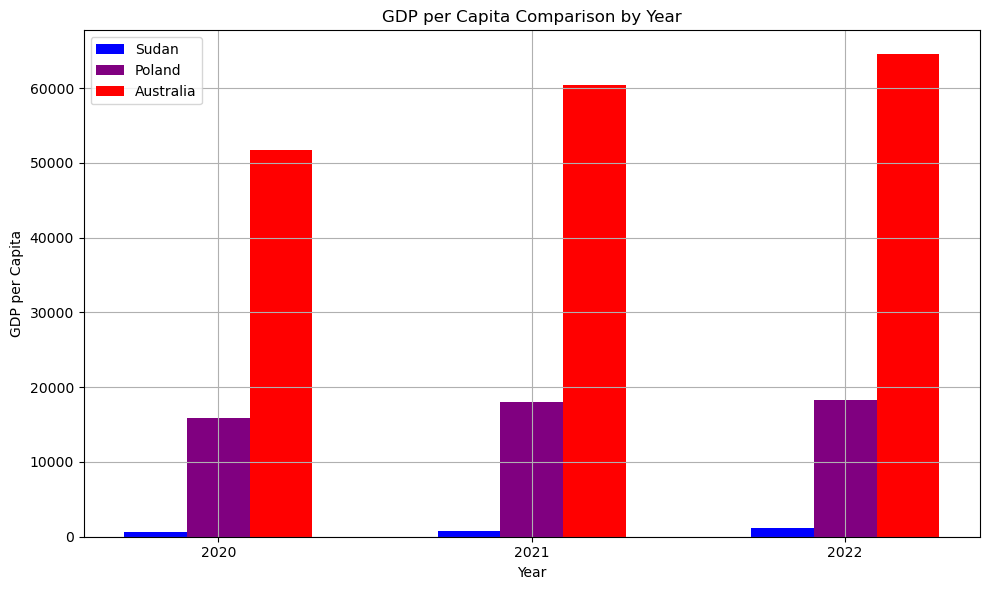

In [27]:
# Create country GDP dataframe for plotting
Country_gdp_data = pd.DataFrame({
    'Date': ['2020', '2021', '2022'],
    'GDP_per_capita_Sudan': [608.332520, 749.706787, 1102.146484], 
    'GDP_per_capita_Poland': [15816.820402, 17999.832268, 18321.280890],  # Poland GDP per capita data
    'GDP_per_capita_Australia': [51722.069000, 60444.502355, 64491.429886]  # Replace with actual Australia data
})

# Define the years and the countries for plotting
years = Country_gdp_data['Date']
countries = ['Sudan', 'Poland', 'Australia']
colours = ['blue', 'purple', 'red']

# Extract GDP per capita values for each country
gdp_per_capita_values = {
    country: Country_gdp_data[f'GDP_per_capita_{country}'] for country in countries
}

# Create a bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(years))

for i, country in enumerate(countries):
    plt.bar([x + i * bar_width for x in index], gdp_per_capita_values[country], bar_width, label=country, color=colours[i])

plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita Comparison by Year')
plt.xticks([x + bar_width for x in index], years)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot as an image
plt.savefig('Images/Q2a_GDP_Per_Capita') 

plt.show()

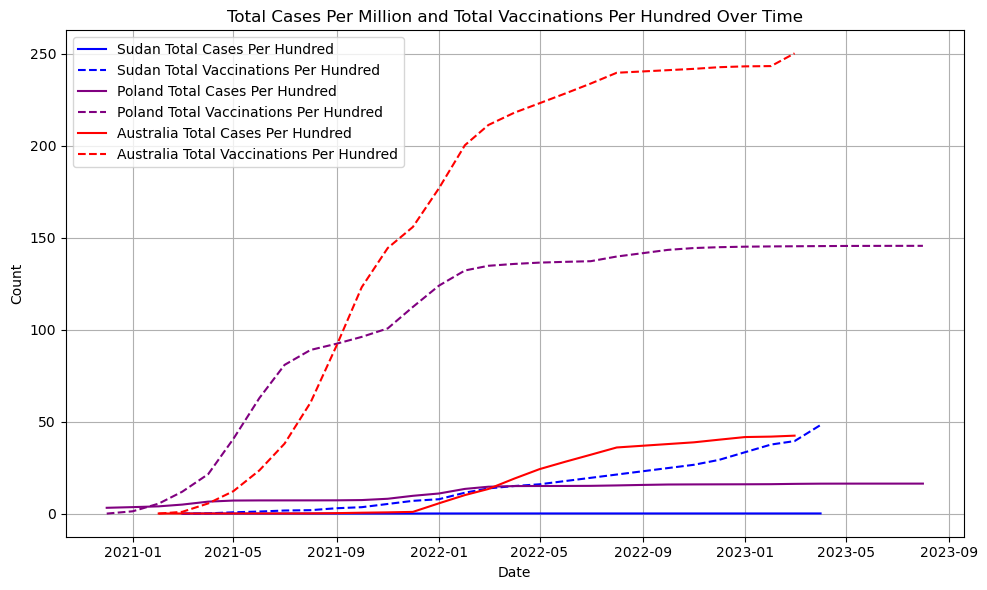

In [20]:
df1 = Sudan_grouped_cm_data.copy()
df2 = Poland_grouped_cm_data.copy()
df3 = Australia_grouped_cm_data.copy()

# Convert 'Date' column to datetime
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])

#Divide by 10000
df1['Total_Cases_PerHundred'] = df1['Total_Cases_PerMillion'] / 10000
df2['Total_Cases_PerHundred'] = df2['Total_Cases_PerMillion'] / 10000
df3['Total_Cases_PerHundred'] = df3['Total_Cases_PerMillion'] / 10000

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(df1['Date'], df1['Total_Cases_PerHundred'], linestyle='-', label='Sudan Total Cases Per Hundred', c= 'b')
plt.plot(df1['Date'], df1['Total_Vaccinations_PerHundred'], linestyle='--', label='Sudan Total Vaccinations Per Hundred', c='b')

plt.plot(df2['Date'], df2['Total_Cases_PerHundred'], linestyle='-', label='Poland Total Cases Per Hundred', c='purple')
plt.plot(df2['Date'], df2['Total_Vaccinations_PerHundred'], linestyle='--', label='Poland Total Vaccinations Per Hundred', c='purple')

plt.plot(df3['Date'], df3['Total_Cases_PerHundred'],  linestyle='-', label='Australia Total Cases Per Hundred', c='r')
plt.plot(df3['Date'], df3['Total_Vaccinations_PerHundred'], linestyle='--', label='Australia Total Vaccinations Per Hundred', c='r')

plt.title('Total Cases Per Million and Total Vaccinations Per Hundred Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot as an image
plt.savefig('Images/Q2b_TotalCase_TotalVaccination') 

plt.show()

**Observation:**
1. Richer country spend more money on vaccination but also record the more Covid19 cases.
2. Lower numbers in poorer country might be due to under reporting,

## Question 3: Australia:  Was vaccination effective? 

## Prepare the dataframe
### Question 3. Vaccinations vs New Cases

In [21]:
## Define a function to output based on certain country.
def process_covid19_sum_mean_data(covid19_data, country):
    # Apply filter for rows where 'location' is in the list_of_countries
    filtered_covid19_data = covid19_data[covid19_data['Location'].isin(country)]
    
    # Drop rows with selective columns null values.  Didn't run this to preserve the data in New Cases and New Deaths and since
    # the People_Fully_Vaccinated_PerHundred columns has lot of null values in certain months
    #cleaned_covid19_data = filtered_covid19_data.dropna(subset=['People_Fully_Vaccinated_PerHundred'])
    
    # Group by 'date' column and aggregate the specified columns
    grouped = filtered_covid19_data.groupby(filtered_covid19_data['Date'].dt.strftime('%Y-%m')).agg({
        'Total_Cases': 'sum',
        'New_Cases': 'sum',
        'Total_Deaths': 'sum',
        'New_Deaths': 'sum',
        'People_Fully_Vaccinated_PerHundred': 'mean',
    })
    
    # Move the index to a new column ('Month-Year')
    grouped.reset_index(drop=False, inplace=True)
    
    return grouped

country = ['Australia']  # Note the use of square brackets to define a list

# to create a filtered data for another country dataframe, just change Australia to Zimbabwe for example
Australia_grouped_gp1_sum_mean_data = process_covid19_sum_mean_data(covid19_data, country)
Australia_grouped_gp1_sum_mean_data.head()

,Date,Total_Cases,New_Cases,Total_Deaths,New_Deaths,People_Fully_Vaccinated_PerHundred
0,2020-01,35.0,9.0,0.0,0.0,NaN
1,2020-02,478.0,16.0,0.0,0.0,NaN
2,2020-03,31988.0,4334.0,231.0,21.0,NaN
3,2020-04,186937.0,2387.0,1895.0,74.0,NaN
4,2020-05,216814.0,439.0,3204.0,12.0,NaN


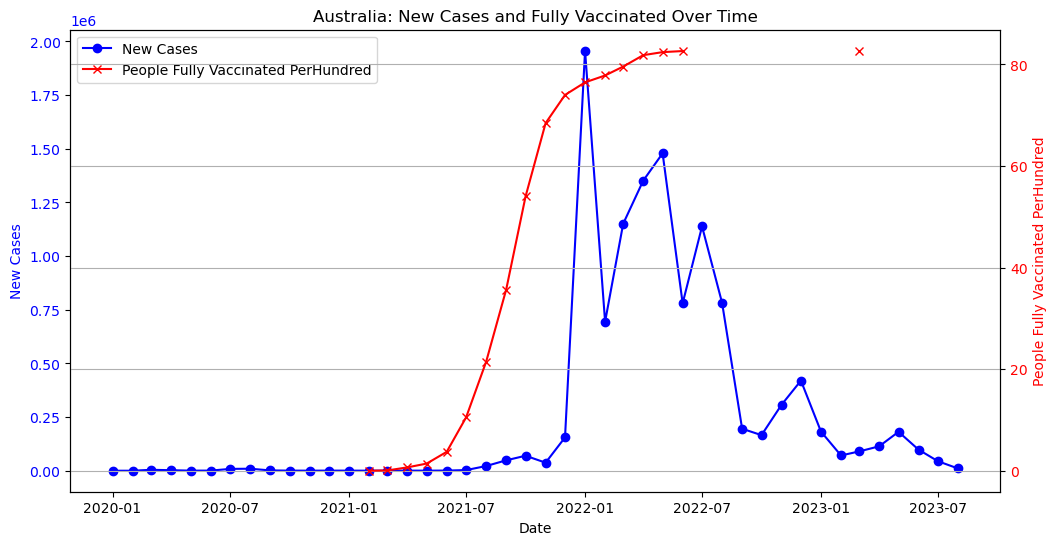

In [22]:
# Plot the required graph
# copy dataframe
df1 = Australia_grouped_gp1_sum_mean_data.copy()

# Convert the 'Date' column to datetime if it's not already in datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m')

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'newCases' on the left y-axis
ax1.plot(df1['Date'], df1['New_Cases'], label='New Cases', color='b', marker='o', linestyle='-')
ax1.set_xlabel('Date')
ax1.set_ylabel('New Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis on the right side for 'newDeaths'
ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['People_Fully_Vaccinated_PerHundred'], label='People Fully Vaccinated PerHundred', color='r', marker='x', linestyle='-')
ax2.set_ylabel('People Fully Vaccinated PerHundred', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

plt.title('Australia: New Cases and Fully Vaccinated Over Time')
plt.grid(True)

# Save the plot as an image
plt.savefig('Images/Q3_Australia_NewCase_vs_FullyVaccinated') 

plt.show()

**Observation:**
1. Increase percentage vaccinated (>80%) seem to coincides with lower New Covid19 Cases.
2. Vaccination seems to lower the number of New Cases but is this coincidence? 
3. Lack of data recording by 2023

## Question 4: How effective was the various vaccines?

In [23]:
# Prepare the dataframe
# List of countries to process
countries = ['Australia', 'China', 'Israel']  # Add more countries as needed

# Dictionary to store grouped data for each country
country_grouped_data = {}

# Loop through the list of countries and process COVID-19 data
for country in countries:
    country_data = process_covid19_sum_mean_data(covid19_data, [country])
    country_grouped_data[country] = country_data

# Access the grouped data for each country
Australia_grouped_gp2_data = country_grouped_data['Australia']
China_grouped_gp2_data = country_grouped_data['China']
Israel_grouped_gp2_data = country_grouped_data['Israel']

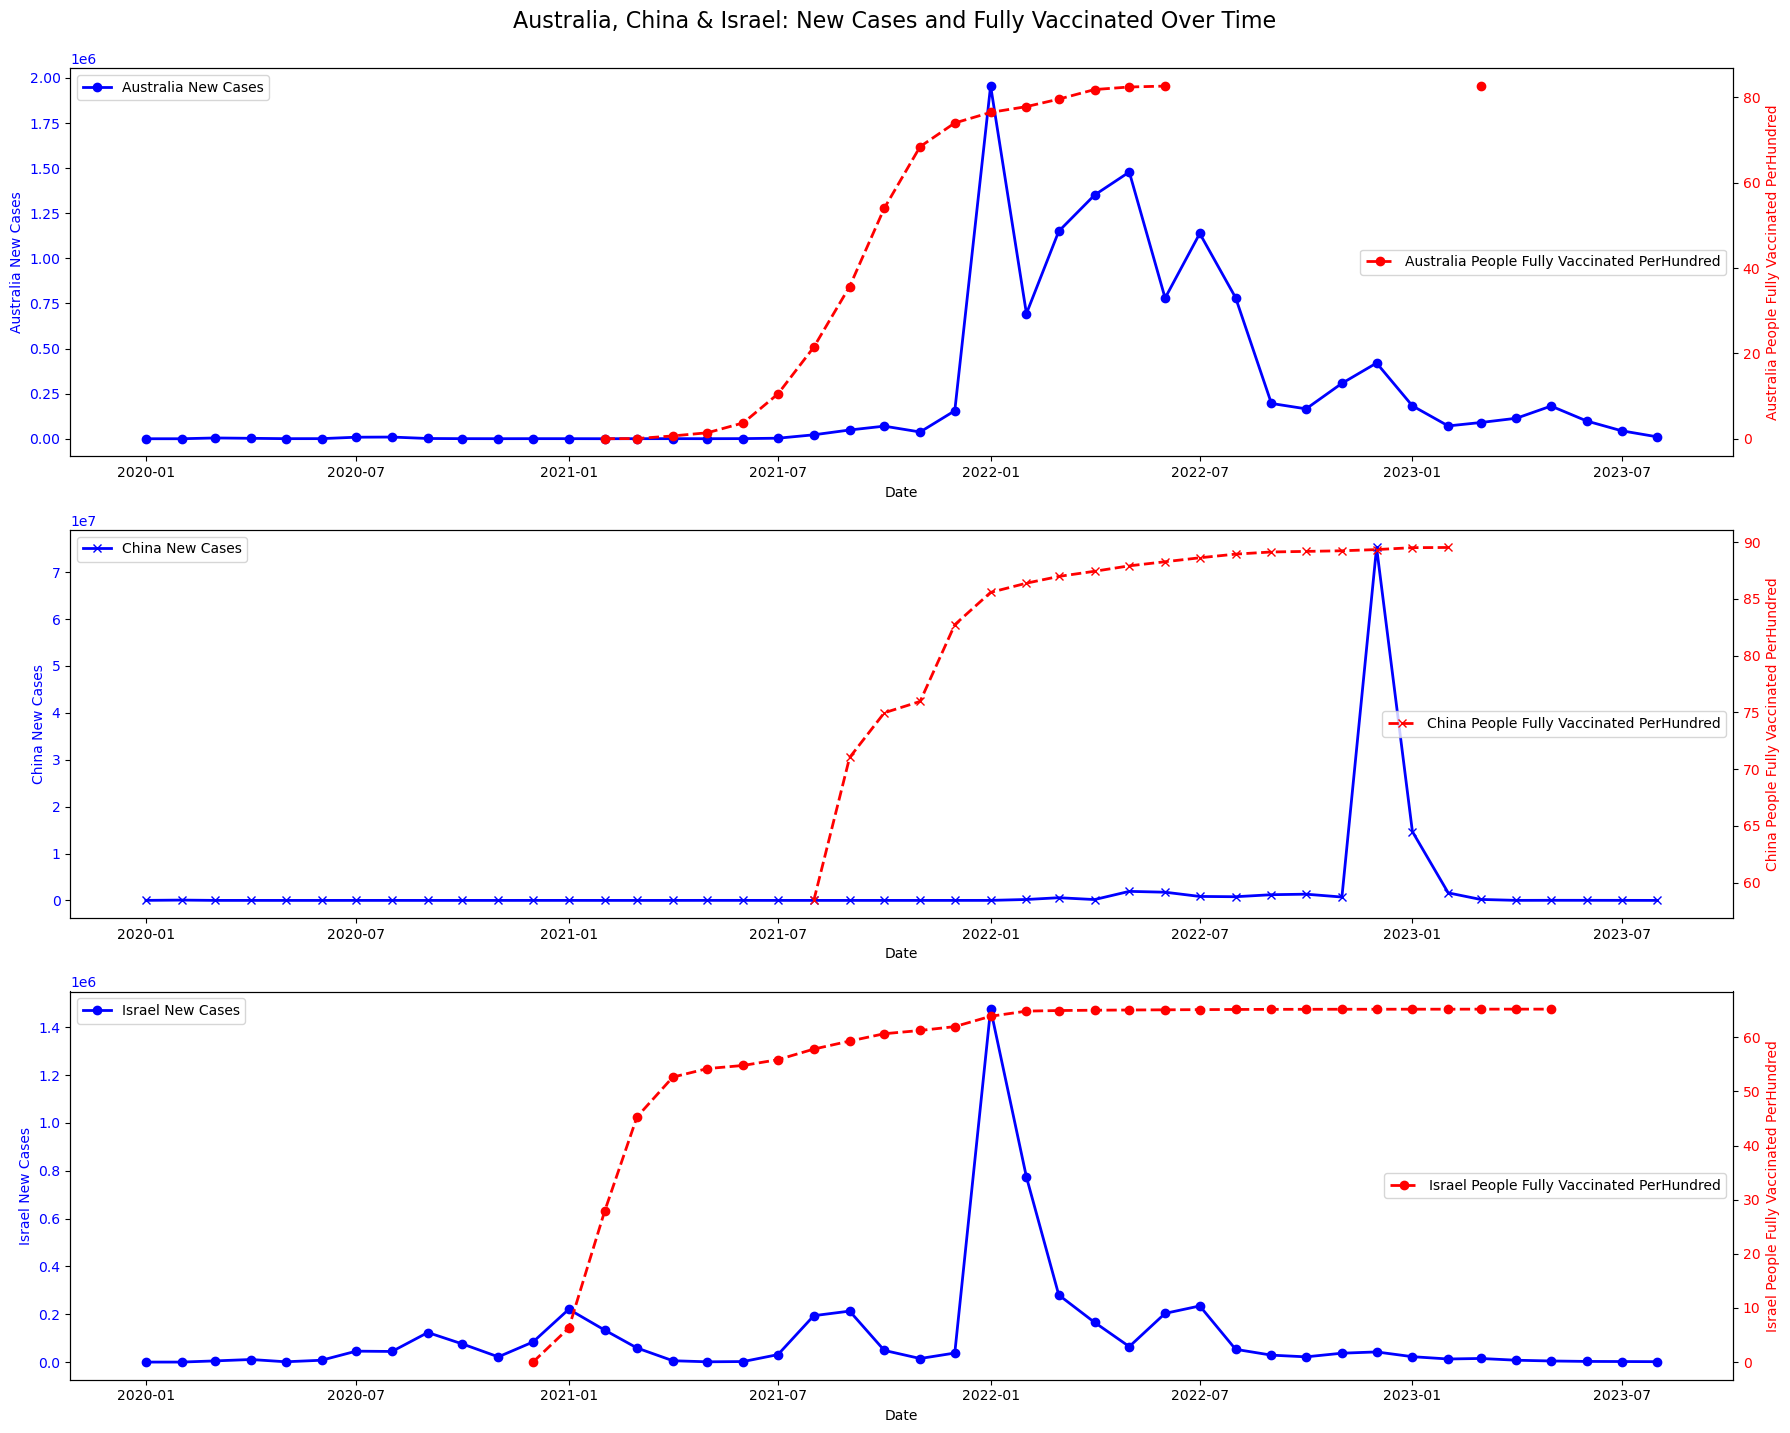

In [24]:
# Copy the DataFrame
df1 = Australia_grouped_gp2_data.copy()
df2 = China_grouped_gp2_data.copy()
df3 = Israel_grouped_gp2_data.copy()

# Assuming you have DataFrames named df1, df2, and df3
# Convert the 'Date' column to datetime if it's not already in datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m')
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m')
df3['Date'] = pd.to_datetime(df3['Date'], format='%Y-%m')

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 14))

# List of DataFrames
dfs = [df1, df2, df3]

# Plot 'newCases' and 'newDeaths' for each country on separate subplots
countries = ['Australia', 'China', 'Israel']
colors1 = ['b', 'b', 'b']
colors2 = ['r', 'r', 'r']
markers = ['o', 'x', 'o']

for i, country in enumerate(countries):
    ax = axes[i]
    df = dfs[i]  # Select the appropriate DataFrame
    ax.plot(df['Date'], df['New_Cases'], label=f'{country} New Cases', color=colors1[i], marker=markers[i], linestyle='-', linewidth=2)
    ax.set_xlabel('Date')
    ax.set_ylabel(f'{country} New Cases', color=colors1[i])
    ax.tick_params(axis='y', labelcolor=colors1[i])
    ax.legend(loc='upper left')
    
    ax2 = ax.twinx()
    ax2.plot(df['Date'], df['People_Fully_Vaccinated_PerHundred'], label=f'{country} People Fully Vaccinated PerHundred', color=colors2[i], marker=markers[i], linestyle='--', linewidth=2)
    ax2.set_ylabel(f'{country} People Fully Vaccinated PerHundred', color=colors2[i])
    ax2.tick_params(axis='y', labelcolor=colors2[i])
    ax2.legend(loc='center right')

# Adjust spacing between subplots
plt.tight_layout()

# Set a super title for the entire figure
fig.suptitle('Australia, China & Israel: New Cases and Fully Vaccinated Over Time', y=1.02, fontsize=16)

# Save the plot as an image
plt.savefig('Images/Q4_Australia_China_Israel_NewCase_FullyVaccinated') 

plt.show()

# Observations:
1. Israel was the first (Dec-20) to vaccinate and achieved 60% fully vaccination within 6 months and continue to vaccinate until May-2023.  However, even with high dosage, Israel was not protected against Omnicron.
2. China started late (Aug-21) in their vaccination program but reach close to 90% people fully vaccinated.   Omnicron spike a year later than Australia and Isreal as they open their internation borders one year later.
3. Australia started in Feb-21 but slower ramping up vaccination upto 80% vaccinated.  Omnicron spike coincides with the opening of internation borders.
4. All the countries were not protected against Omnicron as seen from the high peak cases are associated with Omnicron variant with China having delayed effect due late borders opening.

# Final Conclusion

1. Vaccination seem to be effective in controlling the spread of the Covid19 virus. However, this could be coincidental.
2. Different vaccines seem to work. However, none of the vaccines was able to protect against the Omnicron spreading.
3. Covid19 spread has more or less stopped.
4. It is not conclusive that vaccinations have been effective in controlling the spread of the virus.